# Google Capstone Project: How Can Bellabeat, A Wellness Technology Company Play It Smart?

### This project marks the end of the google data analytics course. It entails analysis of a dataset from Bellabeat on kaggle. 
The analysis follows the 6 steps of Data Analysis taught in the Google course: Ask, Prepare, Process, Analyse, Share and Act.

## STEP 1: ASK PHASE

In this step, we define the problem and objectives of our case study and its desired outcome.

### 1.0 BACKGROUND:

Since 2013, Bellabeat has been a high-tech maker of gorgeously crafted smart devices for women with a focus on their health. Bellabeat has quickly expanded and established itself as a tech-driven wellness brand for women by educating and empowering women with knowledge about their own health and behaviors.

Urka Sren, co-founder and chief creative officer, is sure that examination of non-Bellebeat customer data, such as use data from FitBit fitness trackers, will find further growth opportunities.

## 1.1 BUSINESS TASK: 

Analyze FitBit smart device usage data in order to gain insight into how consumers use FitBit smart devices and discover trends for Bellabeat marketing strategy.

## 1.2 BUSINESS OBJECTIVES:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

## 1.3 DELIVERABLES:

- A clear summary of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of your analysis
- Supporting visualizations and key findings
- Your top high-level content recommendations based on your analysis


## 1.4 KEY STAKEHOLDERS:

- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.

- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.

- Bellabeat marketing analytics team:A team of data analysts guiding Bellabeat’s marketing strategy.


## 2 PREPARE PHASE: 

This phase analyzes the datasets in use and the limitations

2.1 Description of Data Source:

- Data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files.

- Generated by respondents from a survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.

- 30 FitBit users consented to the submission of personal tracker data.

- Data collected includes physical activity recorded in minutes, heart rate, sleep monitoring, daily activity and steps.

- This analysis report only highlights two key data sets from the 18 provided as they contain summary of information stored in  the other datasets.


## 2.2 Limitations Encountered In The Data:

Due to the fact that the data was collected 6 years ago in 2016, it does not accurately represent users’ daily activity, fitness and sleeping habits, diet and food consumption as they may have changed over the years. Data may not be timely or relevant.

- Sample size of 30 FitBit users is not representative of the entire fitness population.

- As data is collected in a survey, we are unable to determine its integrity or accuracy due to human error.

- The entries for different days in the datasets are not consistent.

## 2.3 Bias Or Credibility With The Data: Does the data ROCCC?

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

- Reliable — LOW — The datset has only has 30 respondents and does not summarize the population of users.

- Original — LOW — Third party provider (Amazon Mechanical Turk)

- Comprehensive — MEDIUM — Parameters match most of Bellabeat products’ parameters

- Current — LOW — Data is 6 years old and may not be fit to summarize a recent population

- Cited — LOW — Data collected from third party, hence unknown

It is safe to say that the dataset is considered bad quality data and it is not recommended to produce business strategies based on this data.





## STEP 3: PROCESS
Here, we will process the data by cleaning and ensuring that it is correct, relevant, complete and free of error and outlier by performing:

- Explore and observe data

- Check for and treat missing or null values

- Transform data — format data type

- Perform preliminary statistical analysis

# DATA CLEANING

### IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt


## DATA SELECTION

In [4]:
daily_activity = pd.read_csv('dailyActivity_merged.csv')
sleep_data = pd.read_csv('sleepDay_merged.csv')

### DATA MANIPULATION

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [59]:
daily_activity.shape

(940, 20)

In [5]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 0:00,1,327,346
1,1503960366,4/13/2016 0:00,2,384,407
2,1503960366,4/15/2016 0:00,1,412,442
3,1503960366,4/16/2016 0:00,2,340,367
4,1503960366,4/17/2016 0:00,1,700,712


In [61]:
sleep_data.tail()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_date,Time,sleep_hours,bed_hours,sleep_month,sleep_time,weekday_sleep,month_name_Sleep
408,8792009665,4/30/2016 0:00,1,343,360,2016-04-30,1900-01-01,6.0,6.0,4,1900-01-01,Saturday,April
409,8792009665,5/1/2016 0:00,1,503,527,2016-05-01,1900-01-01,8.0,9.0,5,1900-01-01,Sunday,May
410,8792009665,5/2/2016 0:00,1,415,423,2016-05-02,1900-01-01,7.0,7.0,5,1900-01-01,Monday,May
411,8792009665,5/3/2016 0:00,1,516,545,2016-05-03,1900-01-01,9.0,9.0,5,1900-01-01,Tuesday,May
412,8792009665,5/4/2016 0:00,1,439,463,2016-05-04,1900-01-01,7.0,8.0,5,1900-01-01,Wednesday,May


In [60]:
sleep_data.shape

(413, 13)

In [12]:
#basic information of the data
unique_id = len(pd.unique(daily_activity["Id"]))
sleep_id = len(pd.unique(sleep_data["Id"]))

print ("No of id for daily activity: " + str(unique_id))
print ("No of id for sleep data: " + str(sleep_id))


No of id for daily activity: 33
No of id for sleep data: 24


In [10]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


# OBSERVATIONS

From the above observations, we noted that:

- There are Null or missing values as stated under the ‘Non-Null Count’.
- Data has 15 columns and 940 rows.
- ActivityDate AND SleepDay is wrongly classified as object dtype and has to be converted to datetime64 dtype.
- There are 33 unique IDs, instead of 30 unique IDs as expected. Some users may have created additional IDs during the survey period.
- There are 24 unique IDs in the sleep data. Some users may have not recorded their sleep during thr survey period.



In [27]:
#Activitydate and sleepday are wrongly classified as object dtype instead of datetime
#convert ActivityDate to datetime dtype and format to mm-dd-yyyy
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [32]:
#For sleep day, we have to split the column
sleep_data[['sleep_date', 'Time']] = sleep_data['SleepDay'].str.split(' ', expand=True)
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_date,Time,sleep_hours,bed_hours,sleep_month
0,1503960366,4/12/2016 0:00,1,327,346,4/12/2016,0:00,5.0,6.0,4
1,1503960366,4/13/2016 0:00,2,384,407,4/13/2016,0:00,6.0,7.0,4
2,1503960366,4/15/2016 0:00,1,412,442,4/15/2016,0:00,7.0,7.0,4
3,1503960366,4/16/2016 0:00,2,340,367,4/16/2016,0:00,6.0,6.0,4
4,1503960366,4/17/2016 0:00,1,700,712,4/17/2016,0:00,12.0,12.0,4


In [52]:
sleep_data['sleep_time'] = sleep_data['Time']
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_date,Time,sleep_hours,bed_hours,sleep_month,sleep_time,weekday_sleep,month_name_Sleep
0,1503960366,4/12/2016 0:00,1,327,346,2016-04-12,1900-01-01,5.0,6.0,4,1900-01-01,Tuesday,April
1,1503960366,4/13/2016 0:00,2,384,407,2016-04-13,1900-01-01,6.0,7.0,4,1900-01-01,Wednesday,April
2,1503960366,4/15/2016 0:00,1,412,442,2016-04-15,1900-01-01,7.0,7.0,4,1900-01-01,Friday,April
3,1503960366,4/16/2016 0:00,2,340,367,2016-04-16,1900-01-01,6.0,6.0,4,1900-01-01,Saturday,April
4,1503960366,4/17/2016 0:00,1,700,712,2016-04-17,1900-01-01,12.0,12.0,4,1900-01-01,Sunday,April


In [53]:
#Changing to datetime dtype and converting to mm-dd-yy format.
sleep_data["sleep_date"] = pd.to_datetime(sleep_data["sleep_date"],format = "%m/%d/%Y")
sleep_data['sleep_time'] = sleep_data['Time'] =  pd.to_datetime(sleep_data['sleep_time'],format='%H:%M')

sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    object        
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   sleep_date          413 non-null    datetime64[ns]
 6   Time                413 non-null    datetime64[ns]
 7   sleep_hours         413 non-null    float64       
 8   bed_hours           413 non-null    float64       
 9   sleep_month         413 non-null    int64         
 10  sleep_time          413 non-null    datetime64[ns]
 11  weekday_sleep       413 non-null    object        
 12  month_name_Sleep    413 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(5), object

## Extracting the days of the week from the date columns

In [35]:
#creating column for days of the week
daily_activity["weekday_activity"] = daily_activity["ActivityDate"].dt.day_name() 
sleep_data["weekday_sleep"] = sleep_data["sleep_date"].dt.day_name()


In [36]:
sleep_data["weekday_sleep"].head()

0      Tuesday
1    Wednesday
2       Friday
3     Saturday
4       Sunday
Name: weekday_sleep, dtype: object

## Extracting the Month Numbers and Names From The Date Columns

In [37]:
#Finding month names to understand the trend
#daily_activity
daily_activity['month_num'] = pd.to_datetime(daily_activity["ActivityDate"]).dt.month
daily_activity['month_name']  = daily_activity["ActivityDate"].dt.month_name(locale = 'English')

#sleep_Data
sleep_data['sleep_month'] = pd.to_datetime(sleep_data["sleep_date"]).dt.month
sleep_data['month_name_Sleep']  = sleep_data["sleep_date"].dt.month_name(locale = 'English')

## Calculating The Total Time Logged By Users In Minutes And Hours 

In [17]:
# calculating the total time logged
daily_activity["total_time"] = (daily_activity["VeryActiveMinutes"]
+ daily_activity["FairlyActiveMinutes"]
+ daily_activity["LightlyActiveMinutes"] 
+ daily_activity["SedentaryMinutes"])

daily_activity["total_hours"] = round(daily_activity["total_time"] / 60)

daily_activity["total_hours"].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

In [19]:
sleep_data["sleep_hours"] = round (sleep_data["TotalMinutesAsleep"] / 60)
sleep_data["bed_hours"] = round (sleep_data["TotalTimeInBed"] / 60)

## STEP 4: ANALYZE

In [25]:
#General Statistics
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,month_num,total_time,total_hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,4.350000,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.477224,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,4.000000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,4.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,5.000000,1440.000000,24.000000


In [26]:
sleep_data.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,sleep_month,sleep_hours,bed_hours
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,4.358354,6.995157,7.619855
std,2.060360e+09,0.345521,118.344679,127.101607,0.480098,1.986600,2.134618
min,1.503960e+09,1.000000,58.000000,61.000000,4.000000,1.000000,1.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,4.000000,6.000000,7.000000
50%,4.702922e+09,1.000000,433.000000,463.000000,4.000000,7.000000,8.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,5.000000,8.000000,9.000000
max,8.792010e+09,3.000000,796.000000,961.000000,5.000000,13.000000,16.000000


In [27]:
activity_trend = daily_activity.groupby("Id") ["month_name"].value_counts()
activity_trend

Id          month_name
1503960366  April         19
            May           12
1624580081  April         19
            May           12
1644430081  April         19
                          ..
8583815059  May           12
8792009665  April         19
            May           10
8877689391  April         19
            May           12
Name: month_name, Length: 63, dtype: int64

In [28]:
sleep_trend = sleep_data.groupby("Id") ["month_name_Sleep"].value_counts()
sleep_trend

Id          month_name_Sleep
1503960366  April               15
            May                 10
1644430081  April                2
            May                  2
1844505072  April                2
            May                  1
1927972279  April                5
2026352035  April               17
            May                 11
2320127002  April                1
2347167796  April               15
3977333714  April               19
            May                  9
4020332650  May                  6
            April                2
4319703577  April               16
            May                 10
4388161847  April               14
            May                 10
4445114986  April               16
            May                 12
4558609924  April                3
            May                  2
4702921684  April               18
            May                 10
5553957443  April               19
            May                 12
5577150313  April         

##  STATISTICAL FINDINGS:

- On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement.

- Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

- Noting that a typical daily calorie burn is 2,303, or 0.29 kilos.This could not go into depth to explain real time calories loss since the number of calories expended depends on a number of variables, including age, gender, weight, daily activities, exercise, hormones, and calorie consumption. 

## STEP 5: SHARE

In this stage, we are developing visualizations and presenting our analysis-based findings.

### DAILY ACTIVITY DATASET

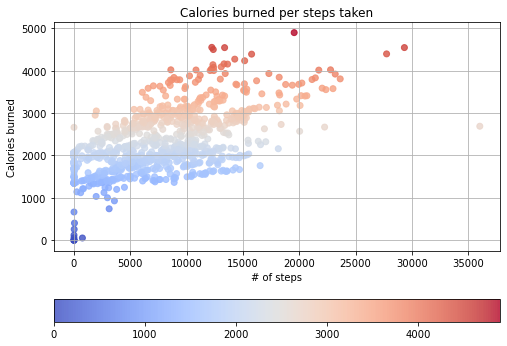

In [29]:
#understanding the relationship between steps taken and calories burned
plt.figure (figsize= (8,6))

plt.scatter(daily_activity.TotalSteps, daily_activity.Calories, alpha = 0.8, c= daily_activity.Calories, cmap = "coolwarm")

plt.colorbar (orientation = "horizontal")
plt.xlabel("# of steps")
plt.ylabel("Calories burned")
plt.title("Calories burned per steps taken")
plt.grid(True)
plt.show()

## Trend of calories burned per steps taken

In this scatterplot, we are looking at the relationship between calories burned and steps taken by users.

Deductions:
- It is a positive correlation.
- The rate in which calories were burned steadily increased when users were between > 0 - 15000 steps.
- Presence of outliers is due to the natural variation of data, human errors during the collection of the data.

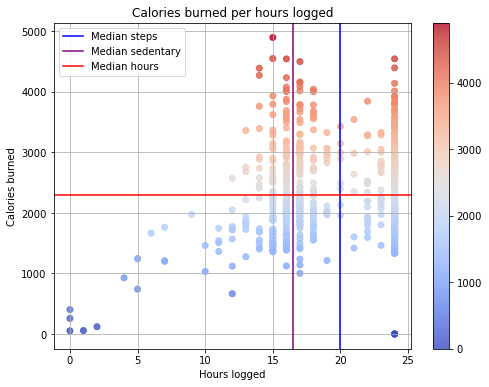

In [22]:
plt.figure (figsize= (8,6))

plt.scatter(daily_activity.total_hours, daily_activity.Calories, alpha = 0.8, c= daily_activity.Calories, cmap = "coolwarm")

median_sedentary = 991 / 60
median_calories = 2303
median_hours = 20

plt.colorbar (orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned per hours logged")
plt.legend()
plt.grid(True)
plt.show()

## Trend of calories burned per steps taken
In this scatterplot, we are looking at the relationship between calories burned and hours logged by users.

Deductions:

- It is a weak positive correlation. This is because sedentary hours (averagely 17 - 20 hours, as denoted by the purple line) make up a bulk of the hours logged and does not necessarily mean the users is being active enough to burn calories.

- Presence of outliers is due to the natural variation of data, human errors during the collection of the data.

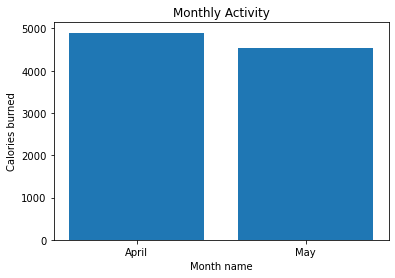

In [31]:
#most active month
plt.bar(daily_activity.month_name, daily_activity.Calories)
plt.xlabel("Month name")
plt.ylabel("Calories burned")
plt.title("Monthly Activity")
plt.show()

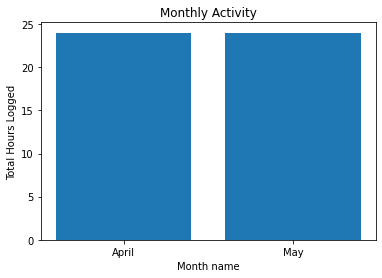

In [40]:
plt.bar(daily_activity.month_name, daily_activity.total_hours)
plt.xlabel("Month name")
plt.ylabel("Total Hours Logged")
plt.title("Monthly Activity")
plt.show()

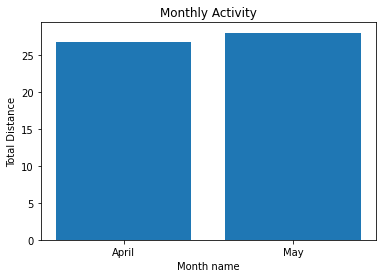

In [41]:
plt.bar(daily_activity.month_name, daily_activity.TotalDistance)
plt.xlabel("Month name")
plt.ylabel("Total Distance")
plt.title("Monthly Activity")
plt.show()

## Trend Of Users During The Months

- The first histogram is a trend of the calories burned by users by month and this makes april higher
- The first histogram is a trend of the hours spent by users by month and this makes april and may equal
- The third histogram is a trend of distance covered users by month and this makes may higher.
- These show that the variations in sedentary minutes and sedentary distance do not account for the amount of calories burned by users. 

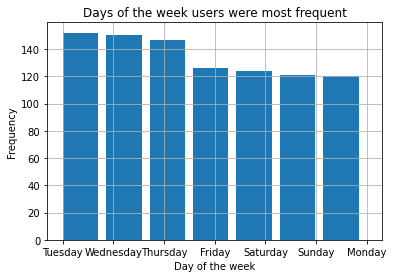

In [32]:
#day of the week trend

plt.figure (figsize= (6,4))

plt.hist(daily_activity.weekday_activity, bins = 7, width = 0.7)


plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("Days of the week users were most frequent")
plt.grid(True)
plt.show()

## Frequency of usage across the week

In this histogram, we are looking at the frequency of users in terms of days of the week.

- We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app during midweek from Tuesday to Friday.
- Noting that the frequency dropped on Friday and continue on weekends and Monday.

In [34]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

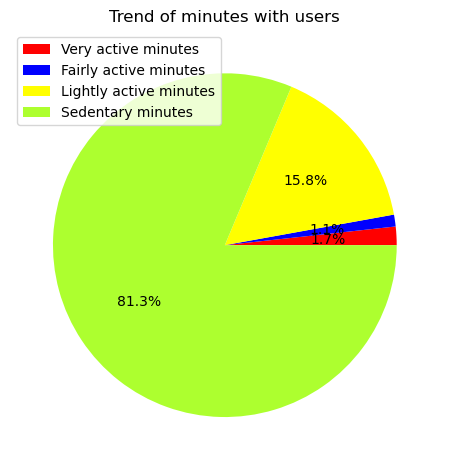

In [76]:
#calculating the time trend of users in a piechart
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours =['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F',
          '#FFA500']
explode = [0, 0, 0, 0]
plt.style.use("default")
plt.pie(slices, 
        colors = colours, explode = explode, autopct = "%1.1f%%")
plt.legend(labels, loc = 'upper left')
plt.title("Trend of minutes with users")
plt.tight_layout()
plt.show()

## Trend Of Minutes With Users

Due to the fact that sedentary minutes of users have caused a lot of variations in the data, we represent minutes spent by users, as seen from the pie chart,

- Sedentary minutes takes the biggest slice at 81.3%.

- This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

- App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

## SLEEP DATA

In [46]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    object        
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   sleep_date          413 non-null    datetime64[ns]
 6   Time                413 non-null    datetime64[ns]
 7   sleep_time          413 non-null    object        
 8   sleep_time          413 non-null    datetime64[ns]
 9   weekday_sleep       413 non-null    object        
 10  sleep_month         413 non-null    int64         
 11  month_name_Sleep    413 non-null    object        
 12  sleep_hours         413 non-null    float64       
 13  bed_hours           413 non-null    float64       

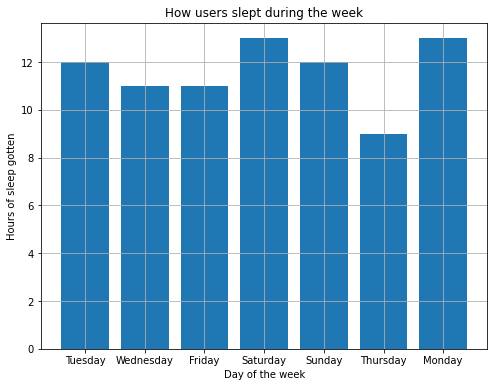

In [51]:
#sleep data

plt.figure (figsize= (8,6))

plt.bar(sleep_data.weekday_sleep, sleep_data.sleep_hours,)


plt.xlabel("Day of the week")
plt.ylabel("Hours of sleep gotten")
plt.title("How users slept during the week")
plt.grid(True)
plt.show()


## Frequency of usage across the week
In this histogram, we are looking at the frequency of users in terms of days of the week.

- We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app on Saturdays and mondays.
- Noting that the frequency dropped on thursdays.

In [55]:
#when do users start counting sleep hours?
time_logged = sleep_data["sleep_time"].value_counts()

print ("Sleep time by user: " + str(time_logged))

Sleep time by user: 0:00    413
Name: sleep_time, dtype: int64


Users remembered to track their sleep activity by midnight

## DATASETS MERGE

The daily activity and sleep datasets were merged, to understand the relatiosnhip between activities during the day and night of users, as a means to understand provision of all round service.

The datasets were merged by outer left because users did not always remember to track their sleep activity.

In [90]:
#merging both datasets
all_data = pd.merge(daily_activity, sleep_data,  on=['Id'])

In [75]:
all_data.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalMinutesAsleep,TotalTimeInBed,sleep_date,Time,sleep_hours,bed_hours,sleep_month,sleep_time,weekday_sleep,month_name_Sleep
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,327,346,2016-04-12,1900-01-01,5.0,6.0,4,1900-01-01,Tuesday,April
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,384,407,2016-04-13,1900-01-01,6.0,7.0,4,1900-01-01,Wednesday,April
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,412,442,2016-04-15,1900-01-01,7.0,7.0,4,1900-01-01,Friday,April
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,340,367,2016-04-16,1900-01-01,6.0,6.0,4,1900-01-01,Saturday,April
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,700,712,2016-04-17,1900-01-01,12.0,12.0,4,1900-01-01,Sunday,April
5,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,304,320,2016-04-19,1900-01-01,5.0,5.0,4,1900-01-01,Tuesday,April
6,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,360,377,2016-04-20,1900-01-01,6.0,6.0,4,1900-01-01,Wednesday,April
7,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,325,364,2016-04-21,1900-01-01,5.0,6.0,4,1900-01-01,Thursday,April
8,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,361,384,2016-04-23,1900-01-01,6.0,6.0,4,1900-01-01,Saturday,April
9,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,430,449,2016-04-24,1900-01-01,7.0,7.0,4,1900-01-01,Sunday,April


In [84]:
all_data.shape

(12668, 32)

In [96]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12441 entries, 0 to 12440
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        12441 non-null  int64         
 1   ActivityDate              12441 non-null  datetime64[ns]
 2   TotalSteps                12441 non-null  int64         
 3   TotalDistance             12441 non-null  float64       
 4   TrackerDistance           12441 non-null  float64       
 5   LoggedActivitiesDistance  12441 non-null  float64       
 6   VeryActiveDistance        12441 non-null  float64       
 7   ModeratelyActiveDistance  12441 non-null  float64       
 8   LightActiveDistance       12441 non-null  float64       
 9   SedentaryActiveDistance   12441 non-null  float64       
 10  VeryActiveMinutes         12441 non-null  int64         
 11  FairlyActiveMinutes       12441 non-null  int64         
 12  LightlyActiveMinut

In [85]:
all_data = len((pd.unique(all_data["Id"])))
print ("No of id for all data: " + str(all_data))

No of id for all data: 33


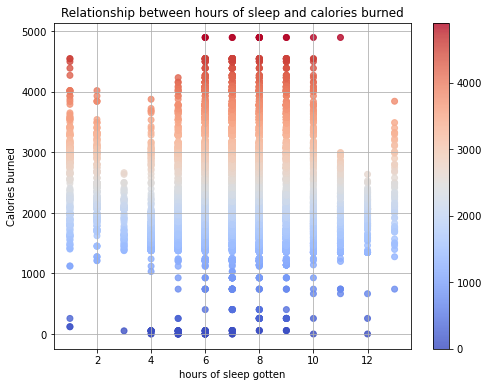

In [99]:
#Relationship between sleep and calories
plt.figure (figsize= (8,6))

plt.scatter(all_data.sleep_hours, all_data.Calories, alpha = 0.8, c= all_data.Calories, cmap = "coolwarm")

plt.colorbar (orientation = "vertical")
plt.xlabel("hours of sleep gotten")
plt.ylabel("Calories burned")
plt.title("Relationship between hours of sleep and calories burned")
plt.grid(True)
plt.show()

## Relationship between hours of sleep and calories burned
 Although, the graph does not depict much,
 
- Users that slept for about 6 -10 hours, with the recommended average length of sleep being 8 hours, burnt the most calories.

## STEP 6: ACT

In this stage, based on our investigation, we will share our findings and offer recommendations.

1. What are the trends identified?

- Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

- Users prefer to track their daily activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.
- Dataset on sleep recognizes that users remember to track their sleep activity mostly on saturdays and mondays.

2. How could these trends apply to Bellabeat customers?

- Due to the fact that both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well be applied to Bellabeat customers.

3. How could these trends help influence Bellabeat marketing strategy?

- The Bellabeat marketing team can motivate users by enlightening and empowering them with knowledge about the advantages of fitness, suggesting various forms of exercise (for example, a straightforward 10 minute exercise on weekdays and a more intense exercise on weekends), and providing information on calorie intake and burn rate on the Bellabeat app.

- On weekends, Bellabeat app can also prompt notification to encourage users to exercise.

- The bellabeat app can also be interactive for users by introducing levels in which they can unlock by reaching some milestones.

